In [727]:
%pip install funpymodeling
%pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [728]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from funpymodeling.exploratory import freq_tbl

## Cargar el archivo

In [729]:
data = pd.read_excel('Allvariables.xlsx')
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,56229,https://www.airbnb.com/rooms/56229,20241211032909,2024-12-12,city scrape,Cosy Double studio in Zone 2 Hammersmith (1),NaN,NaN,https://a0.muscache.com/pictures/3860587/79e73...,216660,...,4.79,4.92,4.71,NaN,f,11,9,1,0,0.84
1,62970,https://www.airbnb.com/rooms/62970,20241211032909,2024-12-12,city scrape,3 Bedrm with Garden off Brick lane refurbd Oct24,Recently renovated (Oct 2024) warehouse conve...,The neighbourhood is fantastic with Brick Lane...,https://a0.muscache.com/pictures/prohost-api/H...,336059,...,4.74,4.63,4.51,NaN,t,1,1,0,0,1.05
2,63948,https://www.airbnb.com/rooms/63948,20241211032909,2024-12-12,city scrape,Cosy Double studio in Zone 2 Hammersmith (4),NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,216660,...,4.78,4.91,4.60,NaN,f,11,9,1,0,1.06
3,66772,https://www.airbnb.com/rooms/66772,20241211032909,2024-12-11,city scrape,Cosy Double studio in Zone 2 Hammersmith (3),NaN,NaN,https://a0.muscache.com/pictures/c71a4e64-97f8...,216660,...,4.77,4.92,4.67,NaN,f,11,9,1,0,1.10
4,69198,https://www.airbnb.com/rooms/69198,20241211032909,2024-12-11,city scrape,Spacious single room in quiet flat,NaN,The flat is situated in a culturally vibrant a...,https://a0.muscache.com/pictures/6073529/f5cf9...,345886,...,4.85,4.62,4.23,NaN,f,1,0,1,0,0.09


## Valores nulos

In [730]:
valores_nulos=data.isnull().sum()
valores_nulos

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               24584
Length: 75, dtype: int64

In [731]:
cuantitativas = data.select_dtypes(include=["float64", "int64"])
cualitativas = data.select_dtypes(include=["object"])
cuantitativas = cuantitativas.fillna(cuantitativas.mean())
cualitativas = cualitativas.fillna("Desconocido")

In [732]:
data1 = pd.concat([cuantitativas, cualitativas], axis=1)

In [733]:
valores_nulos=data1.isnull().sum()
valores_nulos

id                      0
scrape_id               0
host_id                 0
host_response_rate      0
host_acceptance_rate    0
                       ..
room_type               0
bathrooms_text          0
amenities               0
has_availability        0
instant_bookable        0
Length: 70, dtype: int64

## Outliers

<Figure size 10000x100000 with 0 Axes>

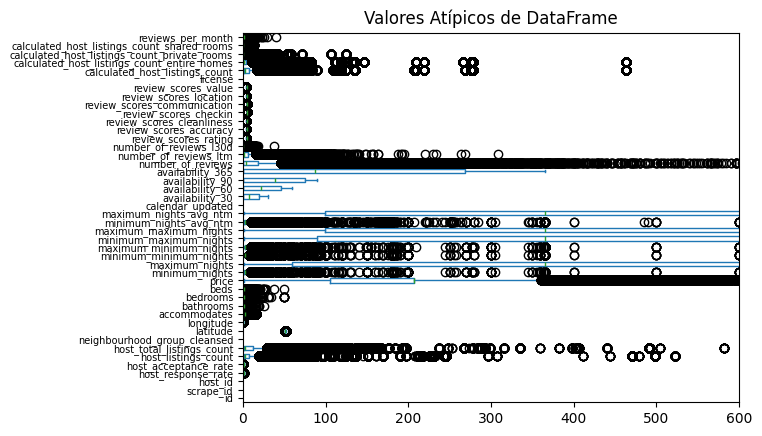

In [734]:
fig = plt.figure(figsize = (100,1000))
cuantitativas.plot(kind='box', vert=False)
plt.xlim([0, 600])
plt.title('Valores Atípicos de DataFrame')
plt.yticks(fontsize=7, rotation=0)
plt.show()

In [735]:
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                                              2.748069e+18
scrape_id                                       2.024121e+13
host_id                                         8.591024e+08
host_response_rate                              1.122396e+00
host_acceptance_rate                            1.243062e+00
host_listings_count                             1.850000e+01
host_total_listings_count                       2.850000e+01
neighbourhood_group_cleansed                             NaN
latitude                                        5.162317e+01
longitude                                       1.162941e-01
accommodates                                    7.000000e+00
bathrooms                                       1.881200e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           3.603540e+02
minimum_nights                                  8.500000e+0

In [736]:
data2_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,56229,20241211032909,216660,0.990000,0.950000,11.0,11.0,NaN,51.493920,-0.227540,...,4.880000,4.790000,4.92000,4.710000,NaN,11.0,9.0,1.0,0.0,0.840000
1,62970,20241211032909,336059,1.000000,1.000000,16.0,NaN,NaN,51.524350,-0.069380,...,4.800000,4.740000,4.63000,4.510000,NaN,1.0,1.0,0.0,0.0,1.050000
2,63948,20241211032909,216660,0.990000,0.950000,11.0,11.0,NaN,51.495470,-0.228640,...,4.870000,4.780000,4.91000,4.600000,NaN,11.0,9.0,1.0,0.0,1.060000
3,66772,20241211032909,216660,0.990000,0.950000,11.0,11.0,NaN,51.493680,-0.227740,...,4.870000,4.770000,4.92000,4.670000,NaN,11.0,9.0,1.0,0.0,1.100000
4,69198,20241211032909,345886,0.918403,0.821292,1.0,1.0,NaN,51.590310,-0.094080,...,4.620000,4.850000,4.62000,4.230000,NaN,1.0,0.0,1.0,0.0,0.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95139,1307783883910080000,20241211032909,445228166,0.918403,0.821292,1.0,1.0,NaN,51.484930,-0.125410,...,4.794925,4.819357,4.73376,4.623557,NaN,1.0,1.0,0.0,0.0,1.015615
95140,1307790077052709888,20241211032909,50878819,0.918403,NaN,1.0,2.0,NaN,51.563762,-0.048858,...,4.794925,4.819357,4.73376,4.623557,NaN,1.0,1.0,0.0,0.0,1.015615
95141,1307791573107140096,20241211032909,131418248,1.000000,0.970000,NaN,NaN,NaN,51.550256,-0.181956,...,4.794925,4.819357,4.73376,4.623557,NaN,NaN,0.0,NaN,0.0,1.015615
95142,1307794952877420032,20241211032909,252350161,0.918403,0.821292,1.0,1.0,NaN,51.588501,-0.353216,...,4.794925,4.819357,4.73376,4.623557,NaN,1.0,0.0,1.0,0.0,1.015615


In [737]:
valores_nulos=data2_iqr.isnull().sum()
valores_nulos

id                                                  0
scrape_id                                           0
host_id                                             0
host_response_rate                               6969
host_acceptance_rate                            11102
host_listings_count                             15279
host_total_listings_count                       15728
neighbourhood_group_cleansed                    95144
latitude                                         3467
longitude                                        3079
accommodates                                     4217
bathrooms                                       14792
bedrooms                                         4246
beds                                             6739
price                                            5832
minimum_nights                                   7531
maximum_nights                                      5
minimum_minimum_nights                          10364
maximum_minimum_nights      

In [738]:
data3_iqr=data2_iqr.copy()
data3_iqr=data2_iqr.fillna(round(data2_iqr.mean(),1))
data3_iqr

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,56229,20241211032909,216660,0.990000,0.950000,11.0,11.0,NaN,51.493920,-0.227540,...,4.880000,4.790000,4.92000,4.710000,NaN,11.0,9.0,1.0,0.0,0.840000
1,62970,20241211032909,336059,1.000000,1.000000,16.0,4.5,NaN,51.524350,-0.069380,...,4.800000,4.740000,4.63000,4.510000,NaN,1.0,1.0,0.0,0.0,1.050000
2,63948,20241211032909,216660,0.990000,0.950000,11.0,11.0,NaN,51.495470,-0.228640,...,4.870000,4.780000,4.91000,4.600000,NaN,11.0,9.0,1.0,0.0,1.060000
3,66772,20241211032909,216660,0.990000,0.950000,11.0,11.0,NaN,51.493680,-0.227740,...,4.870000,4.770000,4.92000,4.670000,NaN,11.0,9.0,1.0,0.0,1.100000
4,69198,20241211032909,345886,0.918403,0.821292,1.0,1.0,NaN,51.590310,-0.094080,...,4.620000,4.850000,4.62000,4.230000,NaN,1.0,0.0,1.0,0.0,0.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95139,1307783883910080000,20241211032909,445228166,0.918403,0.821292,1.0,1.0,NaN,51.484930,-0.125410,...,4.794925,4.819357,4.73376,4.623557,NaN,1.0,1.0,0.0,0.0,1.015615
95140,1307790077052709888,20241211032909,50878819,0.918403,0.900000,1.0,2.0,NaN,51.563762,-0.048858,...,4.794925,4.819357,4.73376,4.623557,NaN,1.0,1.0,0.0,0.0,1.015615
95141,1307791573107140096,20241211032909,131418248,1.000000,0.970000,3.2,4.5,NaN,51.550256,-0.181956,...,4.794925,4.819357,4.73376,4.623557,NaN,2.8,0.0,0.4,0.0,1.015615
95142,1307794952877420032,20241211032909,252350161,0.918403,0.821292,1.0,1.0,NaN,51.588501,-0.353216,...,4.794925,4.819357,4.73376,4.623557,NaN,1.0,0.0,1.0,0.0,1.015615


In [739]:
data = pd.concat([cualitativas, data3_iqr], axis=1)
data

,listing_url,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_location,host_about,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/56229,city scrape,Cosy Double studio in Zone 2 Hammersmith (1),Desconocido,Desconocido,https://a0.muscache.com/pictures/3860587/79e73...,https://www.airbnb.com/users/show/216660,Boris,"London, United Kingdom",I have several studios and apartments in Londo...,...,4.880000,4.790000,4.92000,4.710000,NaN,11.0,9.0,1.0,0.0,0.840000
1,https://www.airbnb.com/rooms/62970,city scrape,3 Bedrm with Garden off Brick lane refurbd Oct24,Recently renovated (Oct 2024) warehouse conve...,The neighbourhood is fantastic with Brick Lane...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/336059,Thomas,"Hamilton Parish, Bermuda",Bermudian/British/Swiss currently based in Ber...,...,4.800000,4.740000,4.63000,4.510000,NaN,1.0,1.0,0.0,0.0,1.050000
2,https://www.airbnb.com/rooms/63948,city scrape,Cosy Double studio in Zone 2 Hammersmith (4),Desconocido,Desconocido,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/216660,Boris,"London, United Kingdom",I have several studios and apartments in Londo...,...,4.870000,4.780000,4.91000,4.600000,NaN,11.0,9.0,1.0,0.0,1.060000
3,https://www.airbnb.com/rooms/66772,city scrape,Cosy Double studio in Zone 2 Hammersmith (3),Desconocido,Desconocido,https://a0.muscache.com/pictures/c71a4e64-97f8...,https://www.airbnb.com/users/show/216660,Boris,"London, United Kingdom",I have several studios and apartments in Londo...,...,4.870000,4.770000,4.92000,4.670000,NaN,11.0,9.0,1.0,0.0,1.100000
4,https://www.airbnb.com/rooms/69198,city scrape,Spacious single room in quiet flat,Desconocido,The flat is situated in a culturally vibrant a...,https://a0.muscache.com/pictures/6073529/f5cf9...,https://www.airbnb.com/users/show/345886,Alda,"London, United Kingdom",I am a video artist and an arts and education ...,...,4.620000,4.850000,4.62000,4.230000,NaN,1.0,0.0,1.0,0.0,0.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95139,https://www.airbnb.com/rooms/1307783883910087285,city scrape,"Central London, River View","Unique appartment in Central London, self-serv...",1 min walk from Vauxhall underground and overg...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/445228166,Anastasiia,Desconocido,Desconocido,...,4.794925,4.819357,4.73376,4.623557,NaN,1.0,1.0,0.0,0.0,1.015615
95140,https://www.airbnb.com/rooms/1307790077052719025,city scrape,Bright flat w/ balcony over park,"Beautiful East London flat, with great connect...",Desconocido,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/50878819,Susan,"London, United Kingdom",Desconocido,...,4.794925,4.819357,4.73376,4.623557,NaN,1.0,1.0,0.0,0.0,1.015615
95141,https://www.airbnb.com/rooms/1307791573107143159,city scrape,6 People - Swiss Cottage - Zone 2,This centrally located room is in an apartment...,Desconocido,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/131418248,Steve,"London, United Kingdom",My goal is to take away the STRESS of finding ...,...,4.794925,4.819357,4.73376,4.623557,NaN,2.8,0.0,0.4,0.0,1.015615
95142,https://www.airbnb.com/rooms/1307794952877424784,city scrape,Newly decorated double room!,Forget your worries in this spacious and seren...,Desconocido,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/252350161,Ursula,"England, United Kingdom",Desconocido,...,4.794925,4.819357,4.73376,4.623557,NaN,1.0,0.0,1.0,0.0,1.015615


In [740]:
valores_nulos=data.isnull().sum()
valores_nulos

listing_url                                     0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 70, dtype: int64

## Análisis univariado de 15 variables categóricas

In [741]:
freq_tbl(data)

                                            listing_url  frequency  \
0                    https://www.airbnb.com/rooms/56229          1   
1       https://www.airbnb.com/rooms/991076683370947706          1   
2       https://www.airbnb.com/rooms/988777680317990919          1   
3       https://www.airbnb.com/rooms/988767733074979098          1   
4       https://www.airbnb.com/rooms/988755765260028381          1   
...                                                 ...        ...   
95139             https://www.airbnb.com/rooms/38865079          1   
95140             https://www.airbnb.com/rooms/38864947          1   
95141             https://www.airbnb.com/rooms/38863651          1   
95142             https://www.airbnb.com/rooms/38862374          1   
95143  https://www.airbnb.com/rooms/1307795865634995863          1   

       percentage  cumulative_perc  
0        0.000011         0.000011  
1        0.000011         0.000021  
2        0.000011         0.000032  
3        0.

In [742]:
table1 = freq_tbl(data['source'])
table1

,source,frequency,percentage,cumulative_perc
0,city scrape,62827,0.660336,0.660336
1,previous scrape,32317,0.339664,1.000000


In [743]:
table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,source,frequency
0,city scrape,62827
1,previous scrape,32317


In [744]:
Filtro_index = table2.set_index('source')
Filtro_index

,frequency
source,
city scrape,62827
previous scrape,32317


<Axes: ylabel='frequency'>

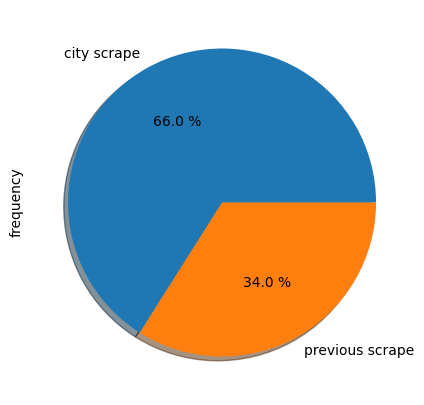

In [745]:
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [746]:
table3 = freq_tbl(data['host_response_time'])
table3

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,42781,0.449645,0.449645
1,Desconocido,32435,0.340904,0.790549
2,within a few hours,9980,0.104894,0.895443
3,within a day,6635,0.069736,0.965179
4,a few days or more,3313,0.034821,1.000000


In [747]:
table4 = table3.drop(['percentage', 'cumulative_perc'], axis=1)
table4

,host_response_time,frequency
0,within an hour,42781
1,Desconocido,32435
2,within a few hours,9980
3,within a day,6635
4,a few days or more,3313


In [748]:
Filtro_index1 = table4.set_index('host_response_time')
Filtro_index1

,frequency
host_response_time,
within an hour,42781
Desconocido,32435
within a few hours,9980
within a day,6635
a few days or more,3313


Text(0, 0.5, 'Frecuencia')

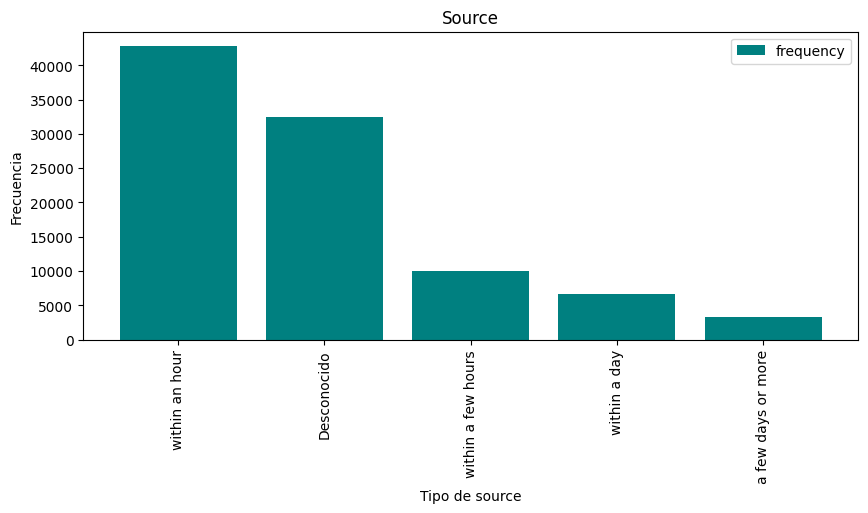

In [749]:
Filtro_index1.plot(kind = 'bar', width=0.8, figsize=(10,4), color='teal')
plt.title('Source')
plt.xlabel('Tipo de source')
plt.ylabel('Frecuencia')

In [750]:
table5 = freq_tbl(data['host_is_superhost'])
table5

,host_is_superhost,frequency,percentage,cumulative_perc
0,f,76478,0.803813,0.803813
1,t,16918,0.177815,0.981628
2,Desconocido,1748,0.018372,1.000000


In [751]:
table6 = table5.drop(['percentage', 'cumulative_perc'], axis=1)
table6

,host_is_superhost,frequency
0,f,76478
1,t,16918
2,Desconocido,1748


In [752]:
Filtro_index2 = table6.set_index('host_is_superhost')
Filtro_index2

,frequency
host_is_superhost,
f,76478
t,16918
Desconocido,1748


<Axes: xlabel='host_is_superhost'>

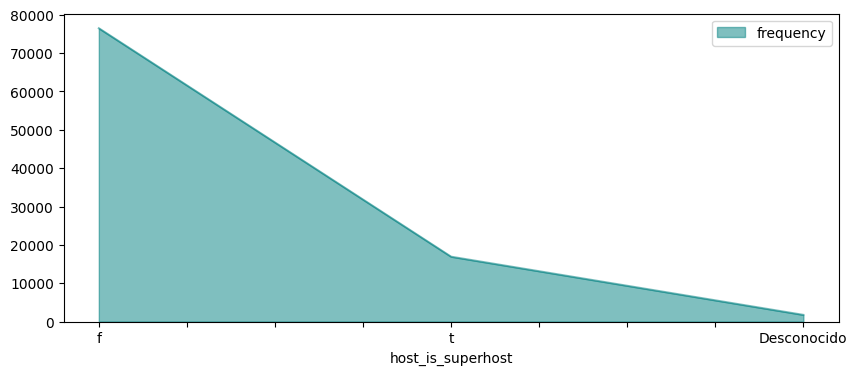

In [753]:
Filtro_index2.plot(kind='area', figsize=(10,4), alpha = 0.5, color='teal')

In [754]:
table7 = freq_tbl(data['host_has_profile_pic'])
table7

,host_has_profile_pic,frequency,percentage,cumulative_perc
0,t,91103,0.957528,0.957528
1,f,4034,0.042399,0.999926
2,Desconocido,7,0.000074,1.000000


In [755]:
table8 = table7.drop(['percentage', 'cumulative_perc'], axis=1)
table8

,host_has_profile_pic,frequency
0,t,91103
1,f,4034
2,Desconocido,7


In [756]:
Filtro_index3 = table8.set_index('host_has_profile_pic')
Filtro_index3

,frequency
host_has_profile_pic,
t,91103
f,4034
Desconocido,7


<Axes: ylabel='frequency'>

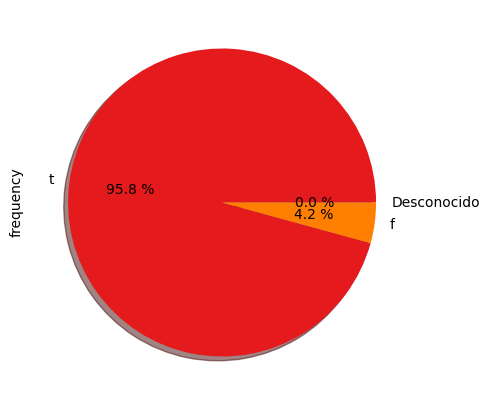

In [757]:
Filtro_index3['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%', colormap='Set1')

In [758]:
table9 = freq_tbl(data['host_identity_verified'])
table10 = table9.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index4 = table10.set_index('host_identity_verified')
Filtro_index4

,frequency
host_identity_verified,
t,83055
f,12082
Desconocido,7


Text(0, 0.5, 'Frecuencia')

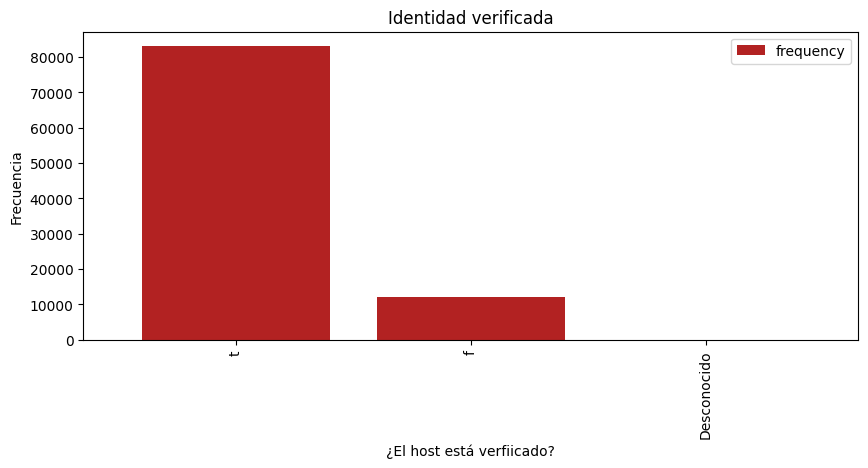

In [759]:
Filtro_index4.plot(kind = 'bar', width=0.8, figsize=(10,4), color='firebrick')
plt.title('Identidad verificada')
plt.xlabel('¿El host está verfiicado?')
plt.ylabel('Frecuencia')

In [760]:
table11 = freq_tbl(data['neighbourhood'])
table12 = table11.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index5 = table12.set_index('neighbourhood')
Filtro_index5

,frequency
neighbourhood,
Desconocido,51680
Neighborhood highlights,43464


<Axes: ylabel='frequency'>

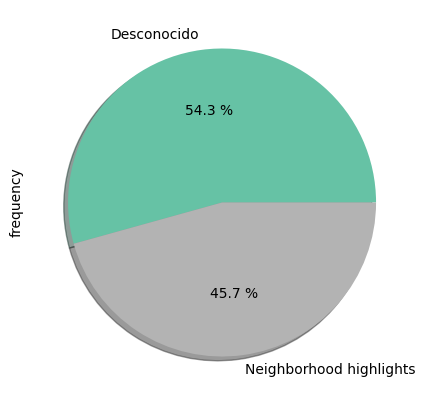

In [761]:
Filtro_index5['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%', colormap='Set2')

In [762]:
table13 = freq_tbl(data['room_type'])
table14 = table13.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index6 = table14.set_index('room_type')
Filtro_index6

,frequency
room_type,
Entire home/apt,60811
Private room,33718
Shared room,433
Hotel room,182


<Axes: xlabel='room_type'>

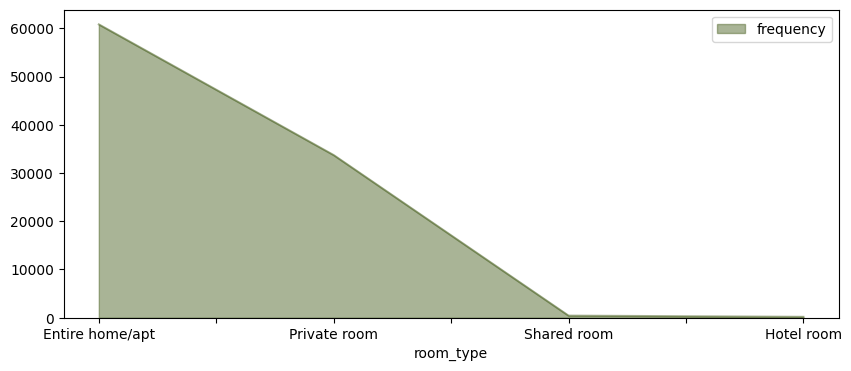

In [763]:
Filtro_index6.plot(kind='area', figsize=(10,4), alpha = 0.5, color='darkolivegreen')

In [764]:
table15 = freq_tbl(data['has_availability'])
table16 = table15.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index7 = table16.set_index('has_availability')
Filtro_index7

,frequency
has_availability,
t,90680
Desconocido,4464


<Axes: ylabel='frequency'>

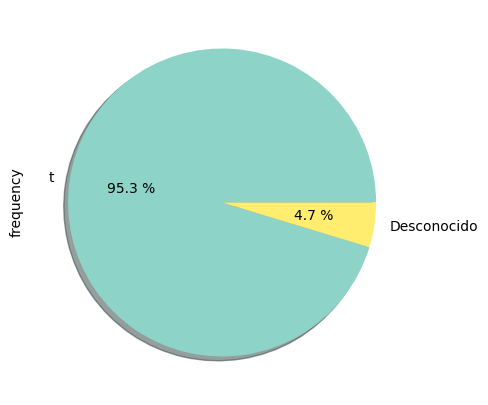

In [765]:
Filtro_index7['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%', colormap='Set3')

In [766]:
table17 = freq_tbl(data['instant_bookable'])
table18 = table17.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index8 = table18.set_index('instant_bookable')
Filtro_index8

,frequency
instant_bookable,
f,66016
t,29128


<Axes: ylabel='frequency'>

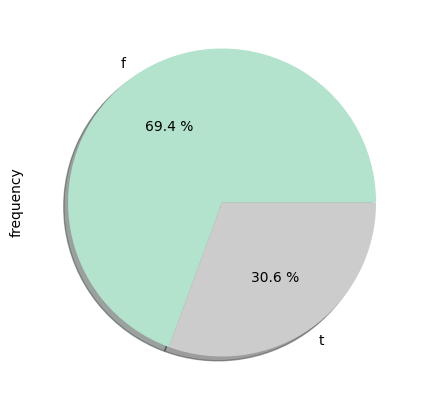

In [767]:
Filtro_index8['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%', colormap='Pastel2')

Las siguientes variables las filtré en primeros 10 o 5 lugares, ya que tenían una gran cantidad de registros únicos 

In [768]:
table19 = freq_tbl(data['bathrooms_text'])
table20 = table19.drop(['percentage', 'cumulative_perc'], axis=1)
top10 = table20.head(10)
Filtro_index10 = top10.set_index('bathrooms_text')
Filtro_index10


,frequency
bathrooms_text,
1 bath,44339
2 baths,12270
1 shared bath,11775
1 private bath,7847
1.5 baths,6289
1.5 shared baths,3076
2.5 baths,2717
3 baths,1639
2 shared baths,1498


Text(0, 0.5, 'Frecuencia')

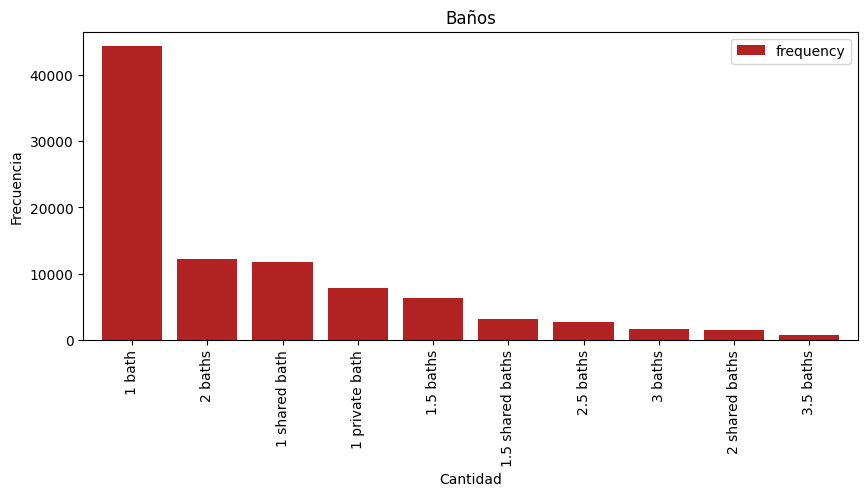

In [769]:
Filtro_index10.plot(kind = 'bar', width=0.8, figsize=(10,4), color='firebrick')
plt.title('Baños')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')

In [770]:
table21 = freq_tbl(data['host_location'])
table22 = table21.drop(['percentage', 'cumulative_perc'], axis=1)
top10a = table22.head(5)
Filtro_index11 = top10a.set_index('host_location')
Filtro_index11

,frequency
host_location,
"London, United Kingdom",53024
Desconocido,22233
"England, United Kingdom",10681
United Kingdom,697
"Paris, France",231


Text(0, 0.5, 'Frecuencia')

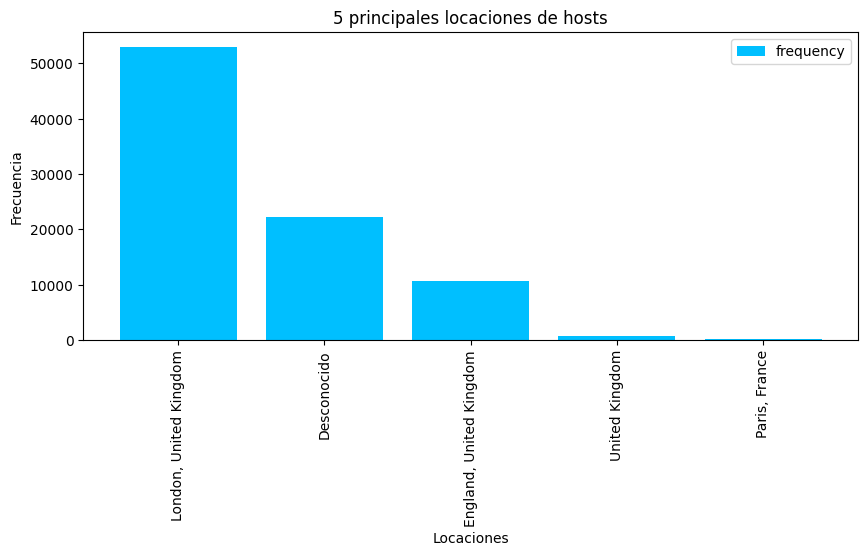

In [771]:
Filtro_index11.plot(kind = 'bar', width=0.8, figsize=(10,4), color='deepskyblue')
plt.title('5 principales locaciones de hosts')
plt.xlabel('Locaciones')
plt.ylabel('Frecuencia')

In [772]:
table23 = freq_tbl(data['host_name'])
table24 = table23.drop(['percentage', 'cumulative_perc'], axis=1)
top10b = table24.head(5)
Filtro_index12 = top10b.set_index('host_name')
Filtro_index12

,frequency
host_name,
James,979
Alex,765
Sarah,544
David,533
Djamshed,486


Text(0, 0.5, 'Frecuencia')

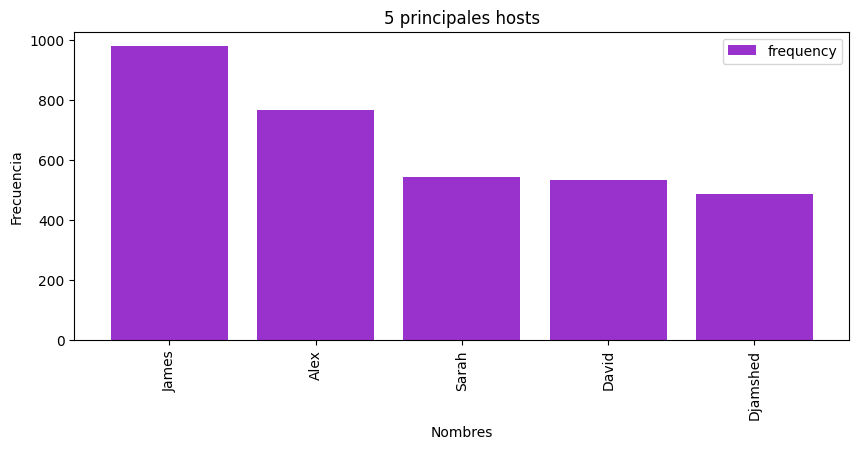

In [773]:
Filtro_index12.plot(kind = 'bar', width=0.8, figsize=(10,4), color='darkorchid')
plt.title('5 principales hosts')
plt.xlabel('Nombres')
plt.ylabel('Frecuencia')

In [774]:
table25 = freq_tbl(data['property_type'])
table26 = table25.drop(['percentage', 'cumulative_perc'], axis=1)
top5c = table26.head(5)
Filtro_index13 = top5c.set_index('property_type')
Filtro_index13

,frequency
property_type,
Entire rental unit,39277
Private room in rental unit,14513
Private room in home,11778
Entire home,8720
Entire condo,8488


<Axes: ylabel='frequency'>

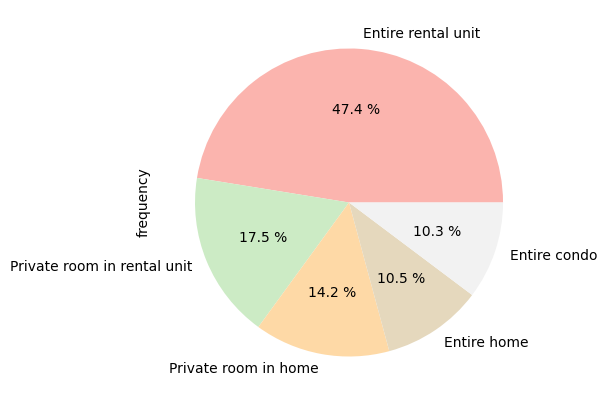

In [775]:
Filtro_index13['frequency'].plot(kind='pie', figsize=(10,5), shadow=False, autopct='%0.1f %%', colormap='Pastel1')

In [776]:
table27 = freq_tbl(data['neighbourhood_cleansed'])
table28 = table27.drop(['percentage', 'cumulative_perc'], axis=1)
top5d = table28.head(5)
Filtro_index14 = top5d.set_index('neighbourhood_cleansed')
Filtro_index14

,frequency
neighbourhood_cleansed,
Westminster,10716
Tower Hamlets,7530
Hackney,6427
Kensington and Chelsea,6344
Camden,6278


<Axes: xlabel='neighbourhood_cleansed'>

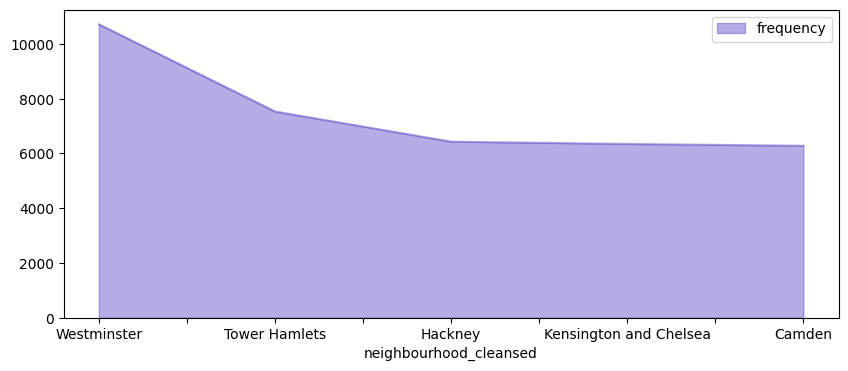

In [777]:
Filtro_index14.plot(kind='area', figsize=(10,4), alpha = 0.5, color='slateblue')

In [885]:
table29 = freq_tbl(data['host_neighbourhood'])
table30 = table29.drop(['percentage', 'cumulative_perc'], axis=1)
top5e = table30.head(5)
Filtro_index15 = top5e.set_index('host_neighbourhood')
Filtro_index15

,frequency
host_neighbourhood,
Desconocido,48827
Hampstead,1328
Shoreditch,1192
Tyburnia,1150
Pimlico,1000


<Axes: xlabel='host_neighbourhood'>

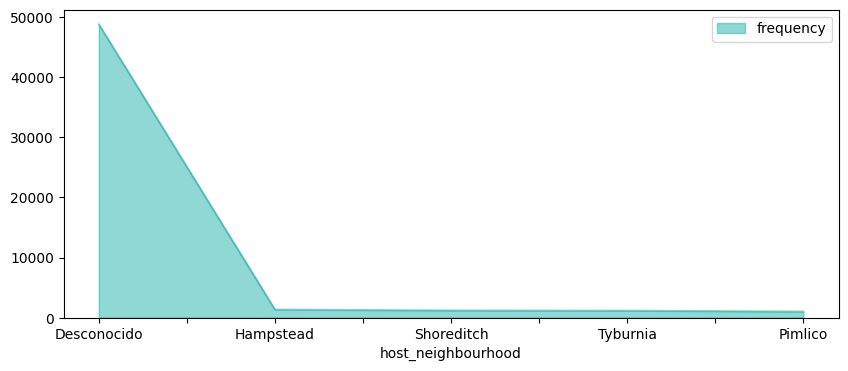

In [887]:
Filtro_index15.plot(kind='area', figsize=(10,4), alpha = 0.5, color='lightseagreen')

## Categorización de variables

**Host response rate**

In [778]:
data['host_response_rate'].info()
n1=95144

<class 'pandas.core.series.Series'>
RangeIndex: 95144 entries, 0 to 95143
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
95144 non-null  float64
dtypes: float64(1)
memory usage: 743.4 KB


In [779]:
Max=data['host_response_rate'].max()
Min=data['host_response_rate'].min()
Limites= [Min, Max]
Limites

[0.8, 1.0]

In [780]:
R=Max-Min
R

0.19999999999999996

In [781]:
ni= 1+3.32*np.log10(n1)
ni

17.528226267505815

In [782]:
i=R/ni
i

0.011410167631779381

In [783]:
intervalos=np.linspace(0.8, 1.0, 18)
intervalos_round=np.round(intervalos, 2)
intervalos_round

array([0.8 , 0.81, 0.82, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.91, 0.92,
       0.93, 0.94, 0.95, 0.96, 0.98, 0.99, 1.  ])

In [784]:
categorias = [f"{intervalos[i]:.2f}-{intervalos[i+1]:.2f}" for i in range(len(intervalos)-1)]

In [785]:
data['host_response_rate']=pd.cut(x= data['host_response_rate'], bins=intervalos_round, labels=categorias)
data['host_response_rate']

0        0.98-0.99
1        0.99-1.00
2        0.98-0.99
3        0.98-0.99
4        0.91-0.92
           ...    
95139    0.91-0.92
95140    0.91-0.92
95141    0.99-1.00
95142    0.91-0.92
95143    0.91-0.92
Name: host_response_rate, Length: 95144, dtype: category
Categories (17, object): ['0.80-0.81' < '0.81-0.82' < '0.82-0.84' < '0.84-0.85' ... '0.95-0.96' < '0.96-0.98' < '0.98-0.99' < '0.99-1.00']

In [786]:
conteo_categorias = data['host_response_rate'].value_counts().sort_index()

<Axes: ylabel='count'>

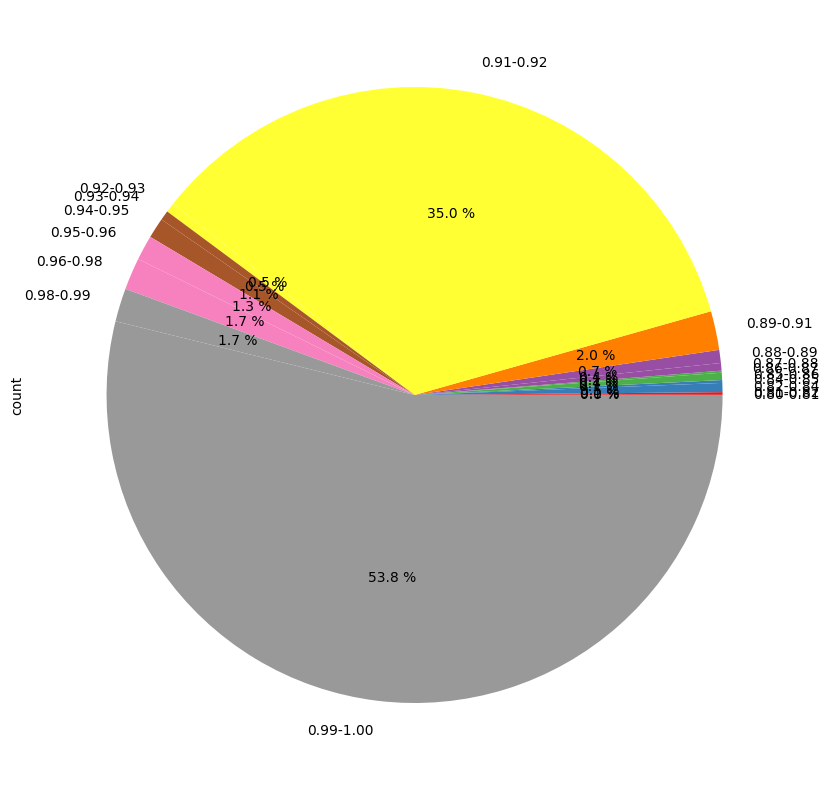

In [787]:
conteo_categorias.plot(kind='pie', figsize=(15,10), shadow=False, autopct='%0.1f %%', colormap='Set1')

**Host acceptance rate**

In [788]:
data['host_acceptance_rate'].info()
n1=95144

<class 'pandas.core.series.Series'>
RangeIndex: 95144 entries, 0 to 95143
Series name: host_acceptance_rate
Non-Null Count  Dtype  
--------------  -----  
95144 non-null  float64
dtypes: float64(1)
memory usage: 743.4 KB


In [789]:
Max1=data['host_acceptance_rate'].max()
Min1=data['host_acceptance_rate'].min()
Limites1= [Min1, Max1]
Limites1

[0.57, 1.0]

In [790]:
R1=Max1-Min1
R1

0.43000000000000005

In [791]:
ni1= 1+3.32*np.log10(n1)
ni1

17.528226267505815

In [792]:
i1=R1/ni1
i1

0.024531860408325678

In [793]:
intervalos1=np.linspace(0.57, 1, 18)
intervalos1_round=np.round(intervalos1, 2)
intervalos1_round

array([0.57, 0.6 , 0.62, 0.65, 0.67, 0.7 , 0.72, 0.75, 0.77, 0.8 , 0.82,
       0.85, 0.87, 0.9 , 0.92, 0.95, 0.97, 1.  ])

In [794]:
categorias1 = [f"{intervalos1_round[i]:.2f}-{intervalos1_round[i+1]:.2f}" for i in range(len(intervalos1_round)-1)]

In [795]:
data['host_acceptance_rate']=pd.cut(x= data['host_acceptance_rate'], bins=intervalos1_round, labels=categorias1)
data['host_acceptance_rate']

0        0.92-0.95
1        0.97-1.00
2        0.92-0.95
3        0.92-0.95
4        0.82-0.85
           ...    
95139    0.82-0.85
95140    0.87-0.90
95141    0.95-0.97
95142    0.82-0.85
95143    0.82-0.85
Name: host_acceptance_rate, Length: 95144, dtype: category
Categories (17, object): ['0.57-0.60' < '0.60-0.62' < '0.62-0.65' < '0.65-0.67' ... '0.90-0.92' < '0.92-0.95' < '0.95-0.97' < '0.97-1.00']

In [796]:
conteo_categorias1 = data['host_acceptance_rate'].value_counts().sort_index()

<Axes: ylabel='count'>

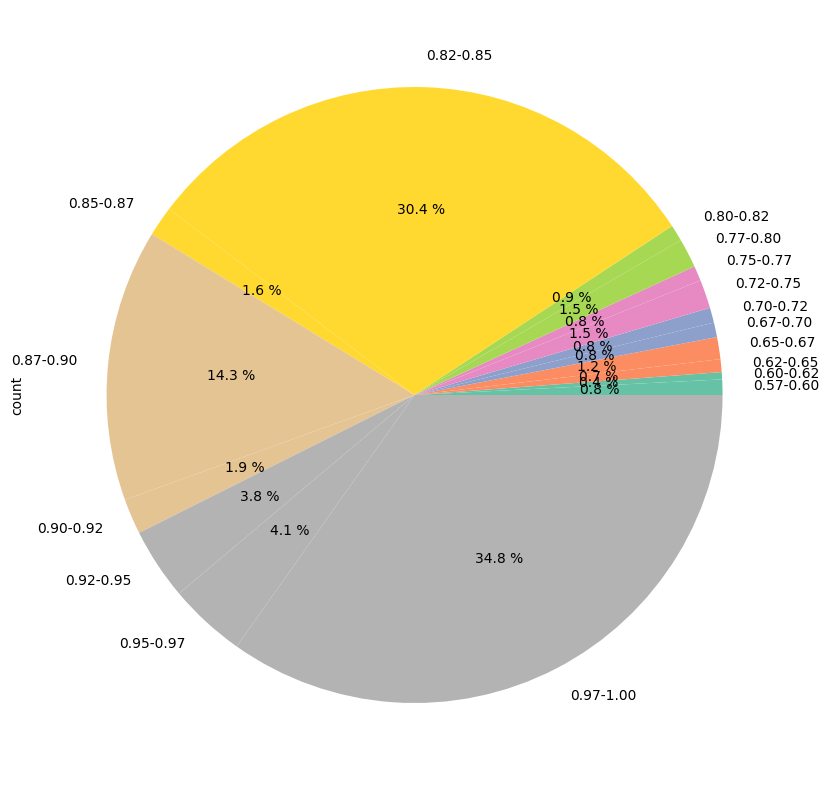

In [797]:
conteo_categorias1.plot(kind='pie', figsize=(15,10), shadow=False, autopct='%0.1f %%', colormap='Set2')

**Host total listings count**

In [798]:
data['host_total_listings_count'].info()
n2=95144

<class 'pandas.core.series.Series'>
RangeIndex: 95144 entries, 0 to 95143
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
95144 non-null  float64
dtypes: float64(1)
memory usage: 743.4 KB


In [799]:
Max2=data['host_total_listings_count'].max()
Min2=data['host_total_listings_count'].min()
Limites2= [Min2, Max2]
Limites2

[1.0, 28.0]

In [800]:
R2=Max2-Min2
R2

27.0

In [801]:
ni2= 1+3.32*np.log10(n2)
ni2

17.528226267505815

In [802]:
i2=R2/ni2
i2

1.5403726302902168

In [897]:
intervalos2=np.linspace(1, 28, 18)
intervalos2_round=np.round(intervalos2, 2)
intervalos2_round

array([ 1.  ,  2.59,  4.18,  5.76,  7.35,  8.94, 10.53, 12.12, 13.71,
       15.29, 16.88, 18.47, 20.06, 21.65, 23.24, 24.82, 26.41, 28.  ])

In [898]:
categorias2 = [f"{intervalos2_round[i]:.2f}-{intervalos2_round[i+1]:.2f}" for i in range(len(intervalos2_round)-1)]

In [899]:
data['host_total_listings_count']=pd.cut(x= data['host_total_listings_count'], bins=intervalos2_round, labels=categorias2)
data['host_total_listings_count']


TypeError: '<' not supported between instances of 'float' and 'str'

In [895]:
conteo_categorias2 = data['host_total_listings_count'].value_counts().sort_index()

<Axes: ylabel='count'>

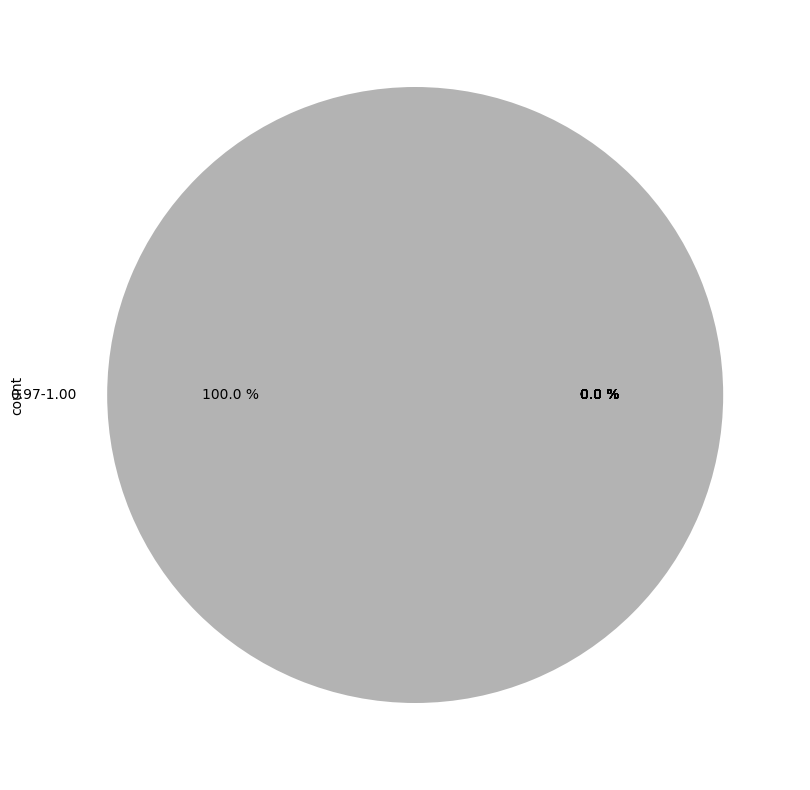

In [896]:
conteo_categorias2.plot(kind='pie', figsize=(15,10), shadow=False, autopct='%0.1f %%', colormap='Set2')

**Accommodates**

In [808]:
data['accommodates'].info()
n3=95144

<class 'pandas.core.series.Series'>
RangeIndex: 95144 entries, 0 to 95143
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
95144 non-null  float64
dtypes: float64(1)
memory usage: 743.4 KB


In [809]:
Max3=data['accommodates'].max()
Min3=data['accommodates'].min()
Limites3= [Min3, Max3]
Limites3

[1.0, 7.0]

In [810]:
R3=Max3-Min3
R3

6.0

In [811]:
ni3= 1+3.32*np.log10(n3)
ni3

17.528226267505815

In [812]:
i3=R3/ni3
i3

0.3423050289533815

In [813]:
intervalos3=np.linspace(1, 7, 18)
intervalos3_round=np.round(intervalos3, 2)
intervalos3_round

array([1.  , 1.35, 1.71, 2.06, 2.41, 2.76, 3.12, 3.47, 3.82, 4.18, 4.53,
       4.88, 5.24, 5.59, 5.94, 6.29, 6.65, 7.  ])

In [814]:
categorias3 = [f"{intervalos3_round[i]:.2f}-{intervalos3_round[i+1]:.2f}" for i in range(len(intervalos3_round)-1)]

In [815]:
data['accommodates']=pd.cut(x= data['accommodates'], bins=intervalos3_round, labels=categorias3)
data['accommodates']

0        1.71-2.06
1        5.94-6.29
2        1.71-2.06
3        1.71-2.06
4              NaN
           ...    
95139    4.88-5.24
95140    1.71-2.06
95141    5.94-6.29
95142    1.71-2.06
95143    1.71-2.06
Name: accommodates, Length: 95144, dtype: category
Categories (17, object): ['1.00-1.35' < '1.35-1.71' < '1.71-2.06' < '2.06-2.41' ... '5.59-5.94' < '5.94-6.29' < '6.29-6.65' < '6.65-7.00']

In [893]:
conteo_categorias3 = data['accommodates'].value_counts().sort_index()

<Axes: ylabel='count'>

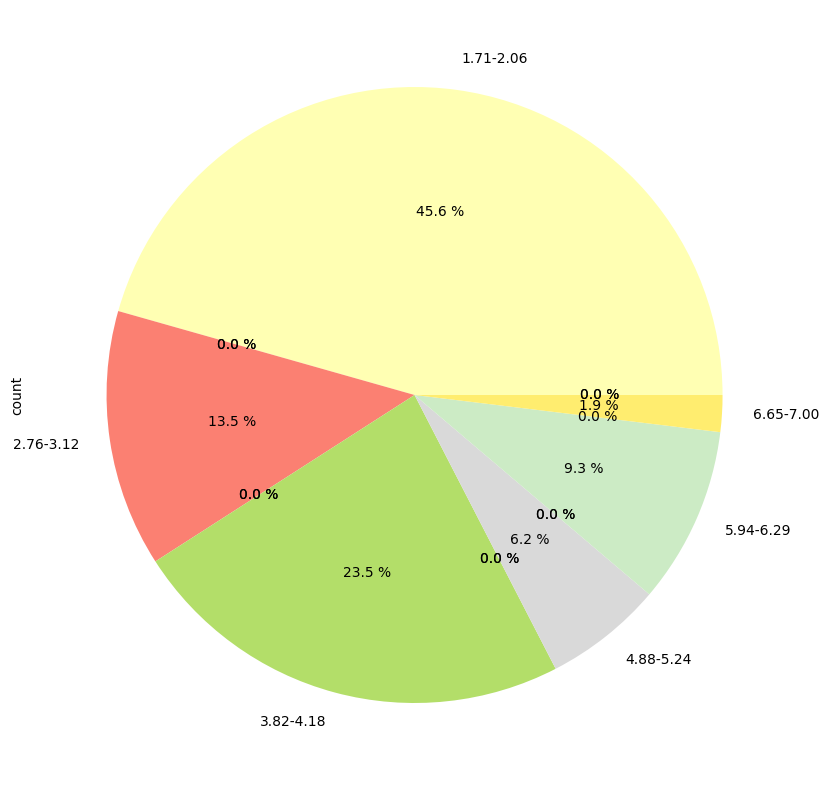

In [894]:
conteo_categorias3.plot(kind='pie', figsize=(15,10), shadow=False, autopct='%0.1f %%', colormap='Set3')

**Beds**

In [818]:
data['beds'].info()
n4=95144

<class 'pandas.core.series.Series'>
RangeIndex: 95144 entries, 0 to 95143
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
95144 non-null  float64
dtypes: float64(1)
memory usage: 743.4 KB


In [819]:
Max4=data['beds'].max()
Min4=data['beds'].min()
Limites4= [Min4, Max4]
Limites4

[0.0, 3.0]

In [820]:
R4=Max4-Min4
R4

3.0

In [821]:
ni4= 1+3.32*np.log10(n4)
ni4

17.528226267505815

In [822]:
i4=R4/ni4
i4

0.17115251447669075

In [823]:
intervalos4=np.linspace(0, 3, 18)
intervalos4_round=np.round(intervalos4, 2)
intervalos4_round

array([0.  , 0.18, 0.35, 0.53, 0.71, 0.88, 1.06, 1.24, 1.41, 1.59, 1.76,
       1.94, 2.12, 2.29, 2.47, 2.65, 2.82, 3.  ])

In [900]:
categorias4 = [f"{intervalos4_round[i]:.2f}-{intervalos4_round[i+1]:.2f}" for i in range(len(intervalos4_round)-1)]

In [901]:
data['beds']=pd.cut(x= data['beds'], bins=intervalos4_round, labels=categorias4)
data['beds']

0        0.88-1.06
1        2.82-3.00
2        0.88-1.06
3        0.88-1.06
4        0.88-1.06
           ...    
95139    1.94-2.12
95140    1.94-2.12
95141    0.88-1.06
95142    0.88-1.06
95143    0.88-1.06
Name: beds, Length: 95144, dtype: category
Categories (17, object): ['0.00-0.18' < '0.18-0.35' < '0.35-0.53' < '0.53-0.71' ... '2.29-2.47' < '2.47-2.65' < '2.65-2.82' < '2.82-3.00']

In [902]:
conteo_categorias4 = data['beds'].value_counts().sort_index()

Text(0, 0.5, 'Frecuencia')

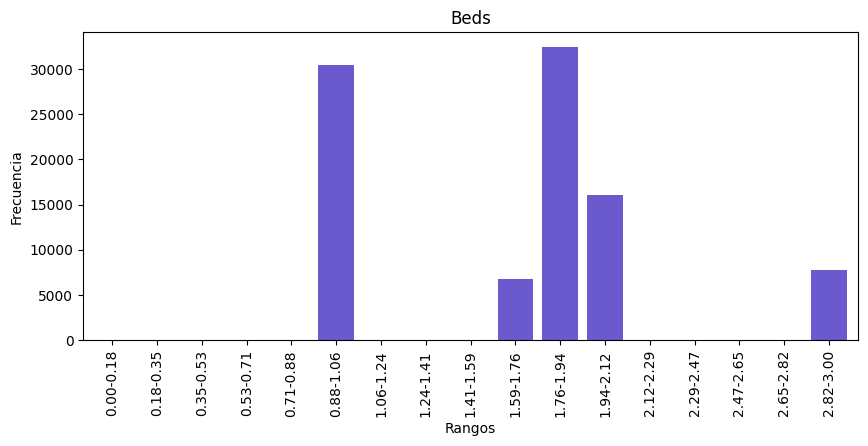

In [904]:
conteo_categorias4.plot(kind = 'bar', width=0.8, figsize=(10,4), color='slateblue')
plt.title('Beds')
plt.xlabel('Rangos')
plt.ylabel('Frecuencia')

**Price**

In [824]:
data['price'].info()
n5=95144

<class 'pandas.core.series.Series'>
RangeIndex: 95144 entries, 0 to 95143
Series name: price
Non-Null Count  Dtype  
--------------  -----  
95144 non-null  float64
dtypes: float64(1)
memory usage: 743.4 KB


In [825]:
Max5=data['price'].max()
Min5=data['price'].min()
Limites5= [Min5, Max5]
Limites5

[1.0, 360.0]

In [826]:
R5=Max5-Min5
R5

359.0

In [827]:
ni5= 1+3.32*np.log10(n5)
ni5

17.528226267505815

In [828]:
i5=R5/ni5
i5

20.481250899043992

In [829]:
intervalos5=np.linspace(1, 360, 18)
intervalos5_round=np.round(intervalos5, 2)
intervalos5_round

array([  1.  ,  22.12,  43.24,  64.35,  85.47, 106.59, 127.71, 148.82,
       169.94, 191.06, 212.18, 233.29, 254.41, 275.53, 296.65, 317.76,
       338.88, 360.  ])

In [830]:
categorias5 = [f"{intervalos5_round[i]:.2f}-{intervalos5_round[i+1]:.2f}" for i in range(len(intervalos5_round)-1)]

In [831]:
data['price']=pd.cut(x= data['price'], bins=intervalos5_round, labels=categorias5)
data['price']

0         85.47-106.59
1        212.18-233.29
2         85.47-106.59
3          64.35-85.47
4          43.24-64.35
             ...      
95139    233.29-254.41
95140     85.47-106.59
95141     85.47-106.59
95142      64.35-85.47
95143    169.94-191.06
Name: price, Length: 95144, dtype: category
Categories (17, object): ['1.00-22.12' < '22.12-43.24' < '43.24-64.35' < '64.35-85.47' ... '275.53-296.65' < '296.65-317.76' < '317.76-338.88' < '338.88-360.00']

In [832]:
conteo_categorias5 = data['price'].value_counts().sort_index()

Text(0, 0.5, 'Frecuencia')

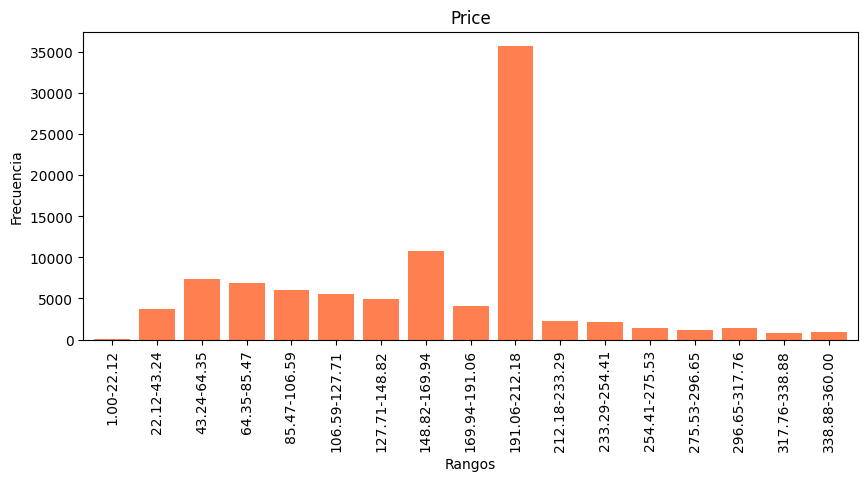

In [833]:
conteo_categorias5.plot(kind = 'bar', width=0.8, figsize=(10,4), color='coral')
plt.title('Price')
plt.xlabel('Rangos')
plt.ylabel('Frecuencia')

**Maximum nights**

In [834]:
data['maximum_nights_avg_ntm'].info()
n6=95144

<class 'pandas.core.series.Series'>
RangeIndex: 95144 entries, 0 to 95143
Series name: maximum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
95144 non-null  float64
dtypes: float64(1)
memory usage: 743.4 KB


In [835]:
Max6=data['maximum_nights_avg_ntm'].max()
Min6=data['maximum_nights_avg_ntm'].min()
Limites6= [Min6, Max6]
Limites6

[1.0, 2000.0]

In [836]:
R6=Max6-Min6
R6

1999.0

In [837]:
ni6= 1+3.32*np.log10(n6)
ni6


17.528226267505815

In [838]:
i6=R6/ni6
i6

114.04462547963493

In [839]:
intervalos6=np.linspace(1, 2000, 18)
intervalos6_round=np.round(intervalos6, 2)
intervalos6_round

array([1.00000e+00, 1.18590e+02, 2.36180e+02, 3.53760e+02, 4.71350e+02,
       5.88940e+02, 7.06530e+02, 8.24120e+02, 9.41710e+02, 1.05929e+03,
       1.17688e+03, 1.29447e+03, 1.41206e+03, 1.52965e+03, 1.64724e+03,
       1.76482e+03, 1.88241e+03, 2.00000e+03])

In [840]:
categorias6 = [f"{intervalos6_round[i]:.2f}-{intervalos6_round[i+1]:.2f}" for i in range(len(intervalos6_round)-1)]

In [841]:
data['maximum_nights_avg_ntm']=pd.cut(x= data['maximum_nights_avg_ntm'], bins=intervalos6_round, labels=categorias6)
data['maximum_nights_avg_ntm']

0          353.76-471.35
1          706.53-824.12
2          706.53-824.12
3        1059.29-1176.88
4          706.53-824.12
              ...       
95139      353.76-471.35
95140        1.00-118.59
95141    1059.29-1176.88
95142      353.76-471.35
95143        1.00-118.59
Name: maximum_nights_avg_ntm, Length: 95144, dtype: category
Categories (17, object): ['1.00-118.59' < '118.59-236.18' < '236.18-353.76' < '353.76-471.35' ... '1529.65-1647.24' < '1647.24-1764.82' < '1764.82-1882.41' < '1882.41-2000.00']

In [842]:
conteo_categorias6 = data['maximum_nights_avg_ntm'].value_counts().sort_index()

Text(0, 0.5, 'Frecuencia')

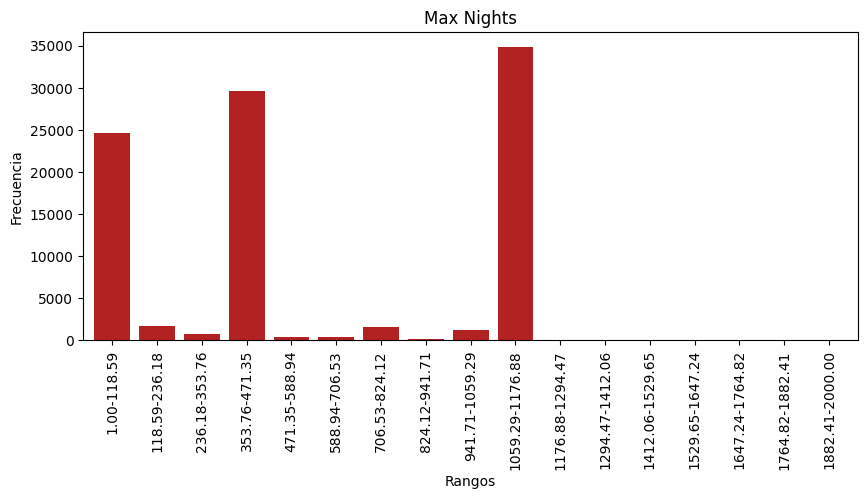

In [843]:
conteo_categorias6.plot(kind = 'bar', width=0.8, figsize=(10,4), color='firebrick')
plt.title('Max Nights')
plt.xlabel('Rangos')
plt.ylabel('Frecuencia')

**Availability 365**

In [844]:
data['availability_365'].info()
n7=95144

<class 'pandas.core.series.Series'>
RangeIndex: 95144 entries, 0 to 95143
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
95144 non-null  int64
dtypes: int64(1)
memory usage: 743.4 KB


In [845]:
Max7=data['availability_365'].max()
Min7=data['availability_365'].min()
Limites7= [Min7, Max7]
Limites7

[0, 365]

In [846]:
R7=Max7-Min7
R7

365

In [847]:
ni7= 1+3.32*np.log10(n7)
ni7

17.528226267505815

In [848]:
i7=R7/ni7
i7

20.823555927997376

In [849]:
intervalos7=np.linspace(0, 365, 18)
intervalos7_round=np.round(intervalos7, 2)
intervalos7_round

array([  0.  ,  21.47,  42.94,  64.41,  85.88, 107.35, 128.82, 150.29,
       171.76, 193.24, 214.71, 236.18, 257.65, 279.12, 300.59, 322.06,
       343.53, 365.  ])

In [850]:
categorias7 = [f"{intervalos7_round[i]:.2f}-{intervalos7_round[i+1]:.2f}" for i in range(len(intervalos7_round)-1)]

In [851]:
data['availability_365']=pd.cut(x= data['availability_365'], bins=intervalos7_round, labels=categorias7)
data['availability_365']

0          21.47-42.94
1        322.06-343.53
2        128.82-150.29
3          42.94-64.41
4        343.53-365.00
             ...      
95139    279.12-300.59
95140    322.06-343.53
95141       0.00-21.47
95142    343.53-365.00
95143      64.41-85.88
Name: availability_365, Length: 95144, dtype: category
Categories (17, object): ['0.00-21.47' < '21.47-42.94' < '42.94-64.41' < '64.41-85.88' ... '279.12-300.59' < '300.59-322.06' < '322.06-343.53' < '343.53-365.00']

In [852]:
conteo_categorias7 = data['availability_365'].value_counts().sort_index()

Text(0, 0.5, 'Frecuencia')

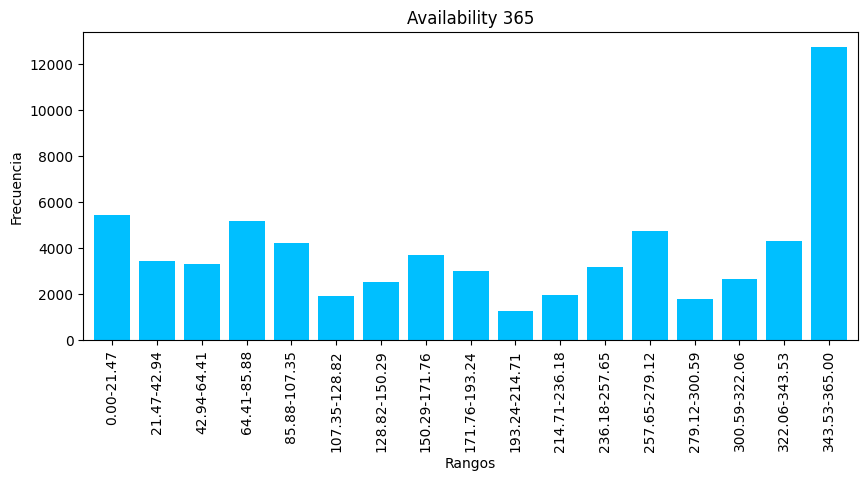

In [853]:
conteo_categorias7.plot(kind = 'bar', width=0.8, figsize=(10,4), color='deepskyblue')
plt.title('Availability 365')
plt.xlabel('Rangos')
plt.ylabel('Frecuencia')

**Number of reviews**


In [854]:
data['number_of_reviews'].info()
n8=95144

<class 'pandas.core.series.Series'>
RangeIndex: 95144 entries, 0 to 95143
Series name: number_of_reviews
Non-Null Count  Dtype  
--------------  -----  
95144 non-null  float64
dtypes: float64(1)
memory usage: 743.4 KB


In [855]:
Max8=data['number_of_reviews'].max()
Min8=data['number_of_reviews'].min()
Limites8= [Min8, Max8]
Limites8

[0.0, 45.0]

In [856]:
R8=Max8-Min8
R8

45.0

In [857]:
ni8= 1+3.32*np.log10(n8)
ni8

17.528226267505815

In [858]:
i8=R8/ni8
i8

2.567287717150361

In [859]:
intervalos8=np.linspace(0, 45, 18)
intervalos8_round=np.round(intervalos8, 2)
intervalos8_round

array([ 0.  ,  2.65,  5.29,  7.94, 10.59, 13.24, 15.88, 18.53, 21.18,
       23.82, 26.47, 29.12, 31.76, 34.41, 37.06, 39.71, 42.35, 45.  ])

In [860]:
categorias8 = [f"{intervalos8_round[i]:.2f}-{intervalos8_round[i+1]:.2f}" for i in range(len(intervalos8_round)-1)]

In [861]:
data['number_of_reviews']=pd.cut(x= data['number_of_reviews'], bins=intervalos8_round, labels=categorias8)
data['number_of_reviews']

0          5.29-7.94
1          5.29-7.94
2          5.29-7.94
3          5.29-7.94
4        10.59-13.24
            ...     
95139            NaN
95140            NaN
95141            NaN
95142            NaN
95143            NaN
Name: number_of_reviews, Length: 95144, dtype: category
Categories (17, object): ['0.00-2.65' < '2.65-5.29' < '5.29-7.94' < '7.94-10.59' ... '34.41-37.06' < '37.06-39.71' < '39.71-42.35' < '42.35-45.00']

In [862]:
conteo_categorias8 = data['number_of_reviews'].value_counts().sort_index()

Text(0, 0.5, 'Frecuencia')

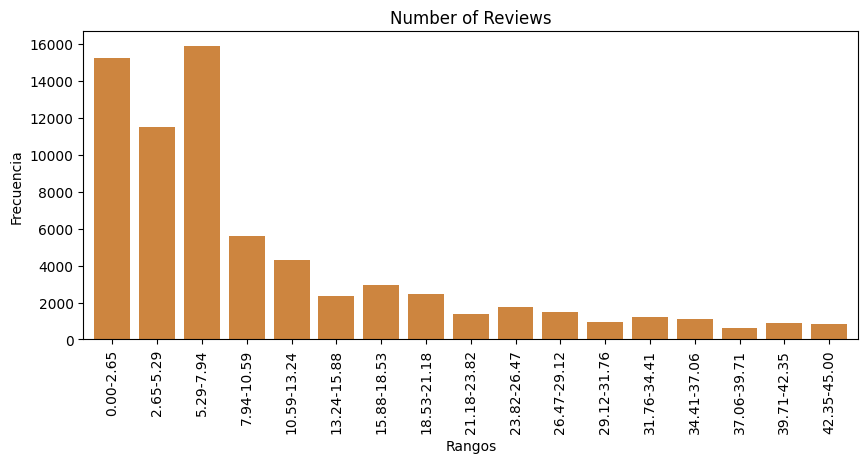

In [863]:
conteo_categorias8.plot(kind = 'bar', width=0.8, figsize=(10,4), color='peru')
plt.title('Number of Reviews')
plt.xlabel('Rangos')
plt.ylabel('Frecuencia')

**Reviews per month**

In [864]:
data['reviews_per_month'].info()
n9=95144

<class 'pandas.core.series.Series'>
RangeIndex: 95144 entries, 0 to 95143
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
95144 non-null  float64
dtypes: float64(1)
memory usage: 743.4 KB


In [865]:
Max9=data['reviews_per_month'].max()
Min9=data['reviews_per_month'].min()
Limites9= [Min9, Max9]
Limites9

[0.01, 2.16]

In [866]:
R9=Max9-Min9
R9

2.1500000000000004

In [867]:
ni9= 1+3.32*np.log10(n9)
ni9

17.528226267505815

In [868]:
i9=R9/ni9
i9

0.12265930204162839

In [869]:
intervalos9=np.linspace(0.01, 2.16, 18)
intervalos9_round=np.round(intervalos9, 2)
intervalos9_round

array([0.01, 0.14, 0.26, 0.39, 0.52, 0.64, 0.77, 0.9 , 1.02, 1.15, 1.27,
       1.4 , 1.53, 1.65, 1.78, 1.91, 2.03, 2.16])

In [870]:
categorias9 = [f"{intervalos9_round[i]:.2f}-{intervalos9_round[i+1]:.2f}" for i in range(len(intervalos9_round)-1)]

In [871]:
data['reviews_per_month']=pd.cut(x= data['reviews_per_month'], bins=intervalos9_round, labels=categorias9)
data['reviews_per_month']

0        0.77-0.90
1        1.02-1.15
2        1.02-1.15
3        1.02-1.15
4        0.01-0.14
           ...    
95139    0.90-1.02
95140    0.90-1.02
95141    0.90-1.02
95142    0.90-1.02
95143    0.90-1.02
Name: reviews_per_month, Length: 95144, dtype: category
Categories (17, object): ['0.01-0.14' < '0.14-0.26' < '0.26-0.39' < '0.39-0.52' ... '1.65-1.78' < '1.78-1.91' < '1.91-2.03' < '2.03-2.16']

In [891]:
conteo_categorias9 = data['reviews_per_month'].value_counts().sort_index()

<Axes: xlabel='reviews_per_month'>

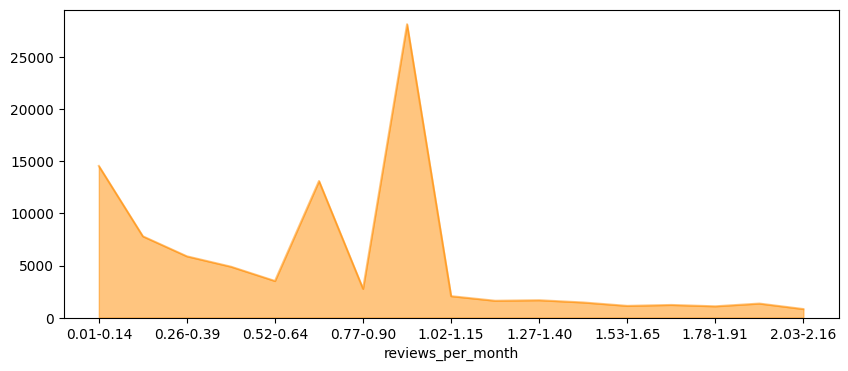

In [892]:
conteo_categorias9.plot(kind='area', figsize=(10,4), alpha = 0.5, color='darkorange')

**Review scores value**

In [874]:
data['review_scores_value'].info()
n10=95144

<class 'pandas.core.series.Series'>
RangeIndex: 95144 entries, 0 to 95143
Series name: review_scores_value
Non-Null Count  Dtype  
--------------  -----  
95144 non-null  float64
dtypes: float64(1)
memory usage: 743.4 KB


In [ ]:
Max10=data['review_scores_value'].max()
Min10=data['review_scores_value'].min()
Limites10= [Min10, Max10]
Limites10

[4.2, 5.0]

In [876]:
R10=Max10-Min10
R10

0.7999999999999998

In [877]:
ni10= 1+3.32*np.log10(n10)
ni10

17.528226267505815

In [878]:
i10=R10/ni10
i10

0.045640670527117524

In [879]:
intervalos10=np.linspace(4.2, 5, 18)
intervalos10_round=np.round(intervalos10, 2)
intervalos10_round

array([4.2 , 4.25, 4.29, 4.34, 4.39, 4.44, 4.48, 4.53, 4.58, 4.62, 4.67,
       4.72, 4.76, 4.81, 4.86, 4.91, 4.95, 5.  ])

In [880]:
categorias10 = [f"{intervalos10_round[i]:.2f}-{intervalos10_round[i+1]:.2f}" for i in range(len(intervalos10_round)-1)]

In [881]:
data['review_scores_value']=pd.cut(x= data['review_scores_value'], bins=intervalos10_round, labels=categorias10)
data['review_scores_value']

0        4.67-4.72
1        4.48-4.53
2        4.58-4.62
3        4.62-4.67
4        4.20-4.25
           ...    
95139    4.62-4.67
95140    4.62-4.67
95141    4.62-4.67
95142    4.62-4.67
95143    4.62-4.67
Name: review_scores_value, Length: 95144, dtype: category
Categories (17, object): ['4.20-4.25' < '4.25-4.29' < '4.29-4.34' < '4.34-4.39' ... '4.81-4.86' < '4.86-4.91' < '4.91-4.95' < '4.95-5.00']

In [882]:
conteo_categorias10 = data['review_scores_value'].value_counts().sort_index()

<Axes: xlabel='review_scores_value'>

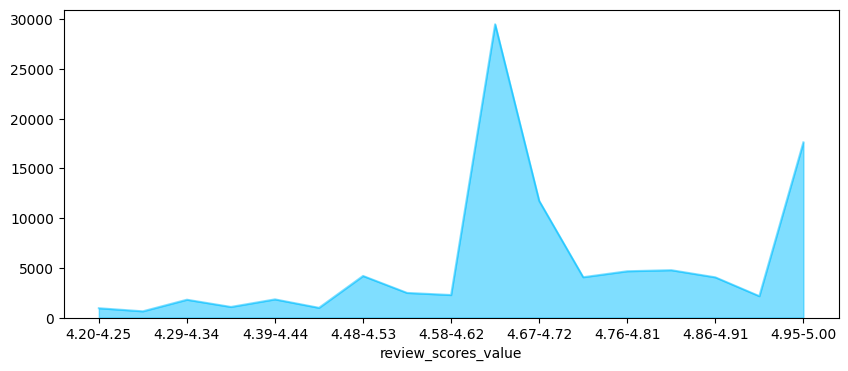

In [883]:
conteo_categorias10.plot(kind='area', figsize=(10,4), alpha = 0.5, color='deepskyblue')

**Reviews per month**

In [ ]:
data['reviews_per_month'].info()
n11=95144

<class 'pandas.core.series.Series'>
RangeIndex: 95144 entries, 0 to 95143
Series name: reviews_per_month
Non-Null Count  Dtype   
--------------  -----   
93053 non-null  category
dtypes: category(1)
memory usage: 93.7 KB


In [890]:
Max11=data['reviews_per_month'].max()
Min11=data['reviews_per_month'].min()
Limites11= [Min11, Max11]
Limites11

['0.01-0.14', '2.03-2.16']